# Currently viewing "Market Saturation & Utilization State-County" 

https://data.cms.gov/summary-statistics-on-use-and-payments/program-integrity-market-saturation-by-type-of-service/market-saturation-utilization-state-county/data

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Market_Saturation_Utilization_State_County_Q4_2023.csv")

/var/folders/dt/mw66jy3s5cz7v9dpqqglz53w0000gn/T/ipykernel_9494/3835708992.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Market_Saturation_Utilization_State_County_Q4_2023.csv")


In [66]:
df.head(5)

,reference_period,type_of_service,aggregation_level,state,county,state_fips,county_fips,number_of_fee_for_service_beneficiaries,number_of_providers,average_number_of_users_per_provider,...,number_of_fee_for_service_beneficiaries_change,number_of_providers_change,average_number_of_users_per_provider_change,percentage_of_users_out_of_ffs_beneficiaries_change,number_of_users_change,average_number_of_providers_per_county_change,number_of_dual_eligible_users_change,percentage_of_dual_eligible_users_out_of_total_users_change,percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries_change,total_payment_change
0,2020-01-01 to 2020-12-31,Ambulance (Emergency & Non-Emergency),NATION + TERRITORIES,--ALL--,--ALL--,,,"36,342,691","8,780",457.58,...,0.61%,( 0.39%),( 7.69%),( 8.60%),( 8.04%),(10.14%),(14.61%),( 7.13%),( 5.70%),( 7.58%)
1,2020-01-01 to 2020-12-31,Ambulance (Emergency & Non-Emergency),STATE,AL,--ALL--,01,,"536,961",145,460.60,...,( 1.92%),( 0.68%),( 8.15%),( 6.96%),( 8.78%),( 6.02%),(19.80%),(12.08%),( 6.10%),( 7.18%)
2,2020-01-01 to 2020-12-31,Ambulance (Emergency & Non-Emergency),STATE,AK,--ALL--,02,,"97,269",26,322.23,...,6.33%,(21.21%),26.38%,( 6.41%),( 0.43%),(16.94%),( 1.69%),( 1.27%),( 3.15%),1.32%
3,2020-01-01 to 2020-12-31,Ambulance (Emergency & Non-Emergency),STATE,AZ,--ALL--,04,,"760,997",145,468.21,...,2.80%,(14.71%),16.66%,( 3.25%),( 0.49%),(17.96%),(14.10%),(13.68%),0.42%,( 1.02%)
4,2020-01-01 to 2020-12-31,Ambulance (Emergency & Non-Emergency),STATE,AR,--ALL--,05,,"435,347",81,622.78,...,( 0.52%),( 5.81%),( 0.84%),( 6.08%),( 6.61%),0.53%,,,,( 6.51%)


In [67]:
df = df.drop_duplicates()
df = df.drop(columns = "county_fips")

In [68]:
df["number_of_fee_for_service_beneficiaries"] = df["number_of_fee_for_service_beneficiaries"].str.replace('[^0-9]','')
df.head(5)

,reference_period,type_of_service,aggregation_level,state,county,state_fips,number_of_fee_for_service_beneficiaries,number_of_providers,average_number_of_users_per_provider,percentage_of_users_out_of_ffs_beneficiaries,...,number_of_fee_for_service_beneficiaries_change,number_of_providers_change,average_number_of_users_per_provider_change,percentage_of_users_out_of_ffs_beneficiaries_change,number_of_users_change,average_number_of_providers_per_county_change,number_of_dual_eligible_users_change,percentage_of_dual_eligible_users_out_of_total_users_change,percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries_change,total_payment_change
0,2020-01-01 to 2020-12-31,Ambulance (Emergency & Non-Emergency),NATION + TERRITORIES,--ALL--,--ALL--,,"36,342,691","8,780",457.58,11.05%,...,0.61%,( 0.39%),( 7.69%),( 8.60%),( 8.04%),(10.14%),(14.61%),( 7.13%),( 5.70%),( 7.58%)
1,2020-01-01 to 2020-12-31,Ambulance (Emergency & Non-Emergency),STATE,AL,--ALL--,01,"536,961",145,460.60,12.44%,...,( 1.92%),( 0.68%),( 8.15%),( 6.96%),( 8.78%),( 6.02%),(19.80%),(12.08%),( 6.10%),( 7.18%)
2,2020-01-01 to 2020-12-31,Ambulance (Emergency & Non-Emergency),STATE,AK,--ALL--,02,"97,269",26,322.23,8.61%,...,6.33%,(21.21%),26.38%,( 6.41%),( 0.43%),(16.94%),( 1.69%),( 1.27%),( 3.15%),1.32%
3,2020-01-01 to 2020-12-31,Ambulance (Emergency & Non-Emergency),STATE,AZ,--ALL--,04,"760,997",145,468.21,8.92%,...,2.80%,(14.71%),16.66%,( 3.25%),( 0.49%),(17.96%),(14.10%),(13.68%),0.42%,( 1.02%)
4,2020-01-01 to 2020-12-31,Ambulance (Emergency & Non-Emergency),STATE,AR,--ALL--,05,"435,347",81,622.78,11.59%,...,( 0.52%),( 5.81%),( 0.84%),( 6.08%),( 6.61%),0.53%,,,,( 6.51%)


In [69]:
# Split the 'reference_period' column into two parts: before and after 'to'
df[['startYear', 'endYear']] = df['reference_period'].str.split('to', expand=True)

# Strip any leading or trailing spaces (if any) from the years
df['startYear'] = df['startYear'].str.strip().str[:4]
df['endYear'] = df['endYear'].str.strip().str[:4]

# Now df will have two new columns: 'startYear' and 'endYear'
print(df[['startYear', 'endYear']].head())

  startYear endYear
0      2020    2020
1      2020    2020
2      2020    2020
3      2020    2020
4      2020    2020


In [70]:
df = df.drop(columns = "reference_period")
df.head(10)

,type_of_service,aggregation_level,state,county,state_fips,number_of_fee_for_service_beneficiaries,number_of_providers,average_number_of_users_per_provider,percentage_of_users_out_of_ffs_beneficiaries,number_of_users,...,average_number_of_users_per_provider_change,percentage_of_users_out_of_ffs_beneficiaries_change,number_of_users_change,average_number_of_providers_per_county_change,number_of_dual_eligible_users_change,percentage_of_dual_eligible_users_out_of_total_users_change,percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries_change,total_payment_change,startYear,endYear
0,Ambulance (Emergency & Non-Emergency),NATION + TERRITORIES,--ALL--,--ALL--,,"36,342,691","8,780",457.58,11.05%,"4,017,592",...,( 7.69%),( 8.60%),( 8.04%),(10.14%),(14.61%),( 7.13%),( 5.70%),( 7.58%),2020,2020
1,Ambulance (Emergency & Non-Emergency),STATE,AL,--ALL--,01,"536,961",145,460.60,12.44%,"66,787",...,( 8.15%),( 6.96%),( 8.78%),( 6.02%),(19.80%),(12.08%),( 6.10%),( 7.18%),2020,2020
2,Ambulance (Emergency & Non-Emergency),STATE,AK,--ALL--,02,"97,269",26,322.23,8.61%,"8,378",...,26.38%,( 6.41%),( 0.43%),(16.94%),( 1.69%),( 1.27%),( 3.15%),1.32%,2020,2020
3,Ambulance (Emergency & Non-Emergency),STATE,AZ,--ALL--,04,"760,997",145,468.21,8.92%,"67,891",...,16.66%,( 3.25%),( 0.49%),(17.96%),(14.10%),(13.68%),0.42%,( 1.02%),2020,2020
4,Ambulance (Emergency & Non-Emergency),STATE,AR,--ALL--,05,"435,347",81,622.78,11.59%,"50,445",...,( 0.84%),( 6.08%),( 6.61%),0.53%,,,,( 6.51%),2020,2020
5,Ambulance (Emergency & Non-Emergency),STATE,CA,--ALL--,06,"3,481,594",304,"1,156.99",10.10%,"351,724",...,( 1.03%),(10.38%),( 8.83%),(13.21%),(10.40%),( 1.72%),( 7.02%),( 8.39%),2020,2020
6,Ambulance (Emergency & Non-Emergency),STATE,CO,--ALL--,08,"515,061",140,296.76,8.07%,"41,546",...,( 8.50%),( 7.67%),( 5.11%),( 3.39%),(17.36%),(12.89%),( 4.96%),( 2.63%),2020,2020
7,Ambulance (Emergency & Non-Emergency),STATE,CT,--ALL--,09,"383,918",174,315.39,14.29%,"54,877",...,( 9.25%),(10.52%),(11.78%),( 7.15%),(15.24%),( 3.93%),( 7.56%),(10.93%),2020,2020
8,Ambulance (Emergency & Non-Emergency),STATE,DE,--ALL--,10,"170,405",80,242.60,11.39%,"19,408",...,8.19%,(11.84%),( 9.84%),(19.39%),(17.86%),( 8.86%),( 6.36%),( 9.95%),2020,2020
9,Ambulance (Emergency & Non-Emergency),STATE,DC,--ALL--,11,"66,439",23,355.04,12.29%,"8,166",...,(12.43%),( 8.83%),( 8.45%),4.55%,(14.09%),( 6.17%),( 3.13%),(10.84%),2020,2020


In [71]:
# Remove the column you want to move
start_year_col = df.pop('startYear')
end_year_col = df.pop('endYear')
# Insert it at the first position (index 0)
df.insert(0, 'startYear', start_year_col)
df.insert(1, 'endYear', end_year_col)

# Now 'startYear' will be the first column
df.head(10)

,startYear,endYear,type_of_service,aggregation_level,state,county,state_fips,number_of_fee_for_service_beneficiaries,number_of_providers,average_number_of_users_per_provider,...,number_of_fee_for_service_beneficiaries_change,number_of_providers_change,average_number_of_users_per_provider_change,percentage_of_users_out_of_ffs_beneficiaries_change,number_of_users_change,average_number_of_providers_per_county_change,number_of_dual_eligible_users_change,percentage_of_dual_eligible_users_out_of_total_users_change,percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries_change,total_payment_change
0,2020,2020,Ambulance (Emergency & Non-Emergency),NATION + TERRITORIES,--ALL--,--ALL--,,"36,342,691","8,780",457.58,...,0.61%,( 0.39%),( 7.69%),( 8.60%),( 8.04%),(10.14%),(14.61%),( 7.13%),( 5.70%),( 7.58%)
1,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,AL,--ALL--,01,"536,961",145,460.60,...,( 1.92%),( 0.68%),( 8.15%),( 6.96%),( 8.78%),( 6.02%),(19.80%),(12.08%),( 6.10%),( 7.18%)
2,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,AK,--ALL--,02,"97,269",26,322.23,...,6.33%,(21.21%),26.38%,( 6.41%),( 0.43%),(16.94%),( 1.69%),( 1.27%),( 3.15%),1.32%
3,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,AZ,--ALL--,04,"760,997",145,468.21,...,2.80%,(14.71%),16.66%,( 3.25%),( 0.49%),(17.96%),(14.10%),(13.68%),0.42%,( 1.02%)
4,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,AR,--ALL--,05,"435,347",81,622.78,...,( 0.52%),( 5.81%),( 0.84%),( 6.08%),( 6.61%),0.53%,,,,( 6.51%)
5,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,CA,--ALL--,06,"3,481,594",304,"1,156.99",...,1.70%,( 7.88%),( 1.03%),(10.38%),( 8.83%),(13.21%),(10.40%),( 1.72%),( 7.02%),( 8.39%)
6,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,CO,--ALL--,08,"515,061",140,296.76,...,2.86%,3.70%,( 8.50%),( 7.67%),( 5.11%),( 3.39%),(17.36%),(12.89%),( 4.96%),( 2.63%)
7,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,CT,--ALL--,09,"383,918",174,315.39,...,( 1.41%),( 2.79%),( 9.25%),(10.52%),(11.78%),( 7.15%),(15.24%),( 3.93%),( 7.56%),(10.93%)
8,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,DE,--ALL--,10,"170,405",80,242.60,...,2.25%,(16.67%),8.19%,(11.84%),( 9.84%),(19.39%),(17.86%),( 8.86%),( 6.36%),( 9.95%)
9,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,DC,--ALL--,11,"66,439",23,355.04,...,0.39%,4.55%,(12.43%),( 8.83%),( 8.45%),4.55%,(14.09%),( 6.17%),( 3.13%),(10.84%)


In [83]:
df = df.set_index("state")

In [93]:
df.isna().sum()

startYear                                                                                   0
endYear                                                                                     0
type_of_service                                                                             0
aggregation_level                                                                           0
county                                                                                      0
state_fips                                                                                  0
number_of_fee_for_service_beneficiaries                                                     0
number_of_providers                                                                         0
average_number_of_users_per_provider                                                        0
percentage_of_users_out_of_ffs_beneficiaries                                                0
number_of_users                                             

In [111]:
df[df["number_of_dual_eligible_users_dual_color"].isna()]
df = df.dropna(subset=["number_of_dual_eligible_users_dual_color"])
df.isna().sum()

startYear                                                                               0
endYear                                                                                 0
type_of_service                                                                         0
aggregation_level                                                                       0
county                                                                                  0
state_fips                                                                              0
number_of_fee_for_service_beneficiaries                                                 0
number_of_providers                                                                     0
average_number_of_users_per_provider                                                    0
percentage_of_users_out_of_ffs_beneficiaries                                            0
number_of_users                                                                         0
average_nu

In [117]:
df.dtypes

startYear                                                                               object
endYear                                                                                 object
type_of_service                                                                         object
aggregation_level                                                                       object
county                                                                                  object
state_fips                                                                              object
number_of_fee_for_service_beneficiaries                                                 object
number_of_providers                                                                     object
average_number_of_users_per_provider                                                    object
percentage_of_users_out_of_ffs_beneficiaries                                            object
number_of_users                                   

In [119]:
df.columns

Index(['startYear', 'endYear', 'type_of_service', 'aggregation_level',
       'county', 'state_fips', 'number_of_fee_for_service_beneficiaries',
       'number_of_providers', 'average_number_of_users_per_provider',
       'percentage_of_users_out_of_ffs_beneficiaries', 'number_of_users',
       'average_number_of_providers_per_county',
       'number_of_dual_eligible_users',
       'percentage_of_dual_eligible_users_out_of_total_users',
       'percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries',
       'total_payment', 'moratorium',
       'number_of_fee_for_service_beneficiaries_dual_color',
       'number_of_fee_for_service_beneficiaries_description',
       'number_of_providers_dual_color', 'number_of_providers_description',
       'average_number_of_users_per_provider_dual_color',
       'average_number_of_users_per_provider_description',
       'percentage_of_users_out_of_ffs_beneficiaries_dual_color',
       'percentage_of_users_out_of_ffs_beneficiaries_des

In [141]:
# Correctly defining the list of columns
columns_to_int = [
    'startYear', 'endYear', 'number_of_fee_for_service_beneficiaries',
    'number_of_providers', 'number_of_users',
    'number_of_dual_eligible_users'
    # 'number_of_fee_for_service_beneficiaries_dual_color',
    # 'number_of_fee_for_service_beneficiaries_description',
    # 'number_of_providers_dual_color', 
    # 'number_of_providers_description',
    # 'number_of_users_dual_color', 
    # 'number_of_users_description',
    # 'number_of_dual_eligible_users_dual_color',
    # 'number_of_dual_eligible_users_description',
    # 'total_payment_dual_color', 
    # 'total_payment_description',
    # 'number_of_fee_for_service_beneficiaries_change',
    # 'number_of_providers_change',
    # 'number_of_users_change',
    # 'number_of_dual_eligible_users_change',
    # 'total_payment_change'
]

# Remove commas and replace empty strings with NaN
df[columns_to_int] = df[columns_to_int].replace(',', '', regex=True).replace(r'^\s*$', np.nan, regex=True)

# Drop rows with NaN values in the specified columns
df = df.dropna(subset=columns_to_int)

# Convert the specified columns to integers
df[columns_to_int] = df[columns_to_int].astype(int)
df["average_number_of_providers_per_county"] = df["average_number_of_providers_per_county"].astype(float)

# Confirm the data types have changed
df.head(10)

,startYear,endYear,type_of_service,aggregation_level,county,state_fips,number_of_fee_for_service_beneficiaries,number_of_providers,average_number_of_users_per_provider,percentage_of_users_out_of_ffs_beneficiaries,...,number_of_fee_for_service_beneficiaries_change,number_of_providers_change,average_number_of_users_per_provider_change,percentage_of_users_out_of_ffs_beneficiaries_change,number_of_users_change,average_number_of_providers_per_county_change,number_of_dual_eligible_users_change,percentage_of_dual_eligible_users_out_of_total_users_change,percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries_change,total_payment_change
state,,,,,,,,,,,,,,,,,,,,,
AL,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,--ALL--,01,536961,145,460.60,12.44%,...,( 1.92%),( 0.68%),( 8.15%),( 6.96%),( 8.78%),( 6.02%),(19.80%),(12.08%),( 6.10%),( 7.18%)
AK,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,--ALL--,02,97269,26,322.23,8.61%,...,6.33%,(21.21%),26.38%,( 6.41%),( 0.43%),(16.94%),( 1.69%),( 1.27%),( 3.15%),1.32%
AZ,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,--ALL--,04,760997,145,468.21,8.92%,...,2.80%,(14.71%),16.66%,( 3.25%),( 0.49%),(17.96%),(14.10%),(13.68%),0.42%,( 1.02%)
CA,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,--ALL--,06,3481594,304,"1,156.99",10.10%,...,1.70%,( 7.88%),( 1.03%),(10.38%),( 8.83%),(13.21%),(10.40%),( 1.72%),( 7.02%),( 8.39%)
CO,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,--ALL--,08,515061,140,296.76,8.07%,...,2.86%,3.70%,( 8.50%),( 7.67%),( 5.11%),( 3.39%),(17.36%),(12.89%),( 4.96%),( 2.63%)
CT,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,--ALL--,09,383918,174,315.39,14.29%,...,( 1.41%),( 2.79%),( 9.25%),(10.52%),(11.78%),( 7.15%),(15.24%),( 3.93%),( 7.56%),(10.93%)
DE,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,--ALL--,10,170405,80,242.60,11.39%,...,2.25%,(16.67%),8.19%,(11.84%),( 9.84%),(19.39%),(17.86%),( 8.86%),( 6.36%),( 9.95%)
DC,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,--ALL--,11,66439,23,355.04,12.29%,...,0.39%,4.55%,(12.43%),( 8.83%),( 8.45%),4.55%,(14.09%),( 6.17%),( 3.13%),(10.84%)
FL,2020,2020,Ambulance (Emergency & Non-Emergency),STATE,--ALL--,12,2362947,213,"1,308.95",11.80%,...,0.85%,(10.13%),3.53%,( 7.74%),( 6.96%),(19.78%),(14.86%),( 8.48%),( 4.49%),( 7.97%)


In [147]:
df.describe()

,startYear,endYear,number_of_fee_for_service_beneficiaries,number_of_providers,number_of_users,average_number_of_providers_per_county,number_of_dual_eligible_users
count,14173.000000,14173.000000,1.417300e+04,14173.000000,1.417300e+04,14173.000000,14173.000000
mean,2021.153108,2021.845551,7.650963e+05,685.957948,1.010344e+05,82.005965,16046.458266
std,0.948272,0.948092,7.450273e+05,1742.572178,2.023569e+05,189.563994,37740.236123
min,2020.000000,2020.000000,2.594000e+04,0.000000,2.500000e+01,0.000000,11.000000
25%,2020.000000,2021.000000,2.472720e+05,65.000000,8.462000e+03,8.130000,1384.000000
50%,2021.000000,2022.000000,5.531880e+05,160.000000,3.060100e+04,22.610000,4799.000000
75%,2022.000000,2023.000000,1.046056e+06,494.000000,9.150800e+04,65.730000,15525.000000
max,2023.000000,2023.000000,3.897705e+06,19297.000000,2.117896e+06,2099.310000,603480.000000


In [163]:
num_var =['startYear', 'endYear', 'number_of_fee_for_service_beneficiaries',
    'number_of_providers', 'number_of_users',
    'number_of_dual_eligible_users']

In [175]:
state_counts = df.index.value_counts()
state_counts

state
AL    286
OK    286
MO    286
NE    286
NV    286
NJ    286
NM    286
NY    286
NC    286
OH    286
PA    286
MN    286
SC    286
TN    286
TX    286
UT    286
VA    286
WA    286
WV    286
WI    286
MS    286
MT    286
MI    286
KS    286
DE    286
MA    286
ID    286
IL    286
IN    286
FL    286
IA    286
KY    286
CO    286
LA    286
CA    286
AZ    286
MD    286
GA    286
CT    285
DC    284
OR    281
AK    280
SD    277
ND    274
VT    273
NH    273
ME    273
WY    273
RI    272
HI    260
Name: count, dtype: int64

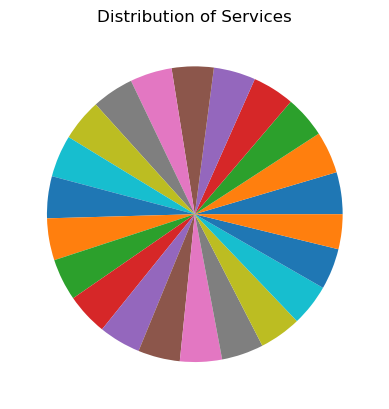

In [187]:
df["type_of_service"].describe()
service_counts = df['type_of_service'].value_counts()
plt.pie(service_counts)
plt.title('Distribution of Services')
plt.show()
plt.